In [1]:
# importing the libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set()
import datetime
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D


evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

In [2]:
#load the data 
link = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
dataset = pd.read_csv(link)
dataset.shape

(201, 29)

In [3]:
#lets look at the dataset
dataset.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Data Cleaning

In [4]:
#lets see the data types
dataset.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [5]:
dataset['num-of-doors'].value_counts()
#we have only two values two and four so lets replace it 

four    115
two      86
Name: num-of-doors, dtype: int64

In [6]:
dataset['num-of-doors'].replace(['two' , 'four'] , [2,4] , inplace= True)
dataset['num-of-doors'] =  dataset['num-of-doors'].infer_objects()

In [7]:
dataset['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [8]:
dataset['num-of-cylinders'].replace(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'] , [4,6,5,3,12,2,8] , inplace= True)
dataset['num-of-cylinders'] =  dataset['num-of-cylinders'].infer_objects()

In [11]:
dataset['num-of-cylinders'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [14]:
# function: Dataset characteristics
def data_characteristics(dataset):
    space = """
    
    """
    #shape of dataset
    print('Shape of dataset :                {}'.format(dataset.shape))
    print('Number of Rows in the dataset:    {}'.format(dataset.shape[0]))
    print('Number of Columns in the dataset: {}'.format(dataset.shape[1]))
    print("")
    print('|' +'-'*60 + "|")
    print(space)
    #Understanding the Number of Numerical and Categorical features in dataset
    
    numerical_features = dataset.select_dtypes(include = [np.number])
    categorical_features = dataset.select_dtypes(exclude = [np.number])
    print("Number of Numerical features: {}".format(numerical_features.shape[1]))
    print("Number of Categorical features: {}".format(categorical_features.shape[1]))
    print("")
    print('|' +'-'*60 + "|")
    print(space)
    
    
    #list of features based on category or numeric
    print("Categorical Features: ")
    print(categorical_features.columns)
    print(space)
    print("numerical features: ")
    print(numerical_features.columns)
    print(space)
    
    
    #unique values
    print("No of unique values : ")
    print('Columns   count_unique_values')
    print(format(dataset.nunique()))
    print("")
    print('|' +'-'*60 + "|")
    print(space)
    
    #number of not null values
    print("No. of NON-NAN's : ")
    print(format(dataset.count()))
    print("")
    print('|' +'-'*60 + "|")
    print(space)
    
    #understanding the dataset
    print("Information of Dataset: {}".format(dataset.info(verbose = False,memory_usage = 'deep')))
    print(" ")
    print('|' +'-'*60 + "|")
    print(space)
    
    #statistical summary of dataset
data_characteristics(dataset)
print("Statistical Summary of the dataset : ")
dataset.describe(percentiles = [.15,.25,.50,.75,.85])
    

Shape of dataset :                (201, 29)
Number of Rows in the dataset:    201
Number of Columns in the dataset: 29

|------------------------------------------------------------|

    
    
Number of Numerical features: 21
Number of Categorical features: 8

|------------------------------------------------------------|

    
    
Categorical Features: 
Index(['make', 'aspiration', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type', 'fuel-system', 'horsepower-binned'],
      dtype='object')

    
    
numerical features: 
Index(['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'city-L/100km',
       'diesel', 'gas'],
      dtype='object')

    
    
No of unique values : 
Columns   count_unique_values
symboling              6
normalized-losses     51
m

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,3.144279,98.797015,0.837102,0.915126,53.766667,2555.666667,4.363184,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,0.992008,6.066366,0.059213,0.029187,2.447822,517.296727,1.059452,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,2.000000,86.600000,0.678039,0.837500,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
15%,0.000000,91.00000,2.000000,93.700000,0.764536,0.886111,50.800000,2008.000000,4.000000,92.000000,3.030000,3.030000,8.300000,68.000000,4750.000000,19.000000,24.000000,6938.000000,7.580645,0.000000,1.000000
25%,0.000000,101.00000,2.000000,94.500000,0.801538,0.890278,52.000000,2169.000000,4.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,4.000000,97.000000,0.832292,0.909722,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,4.000000,102.400000,0.881788,0.925000,55.500000,2926.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
85%,2.000000,158.00000,4.000000,104.900000,0.907256,0.948611,56.100000,3095.000000,5.000000,161.000000,3.620000,3.500000,9.500000,145.000000,5500.000000,31.000000,38.000000,18420.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,4.000000,120.900000,1.000000,1.000000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000




<h4>Evaluating for Missing Data</h4>

The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [15]:
dataset.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


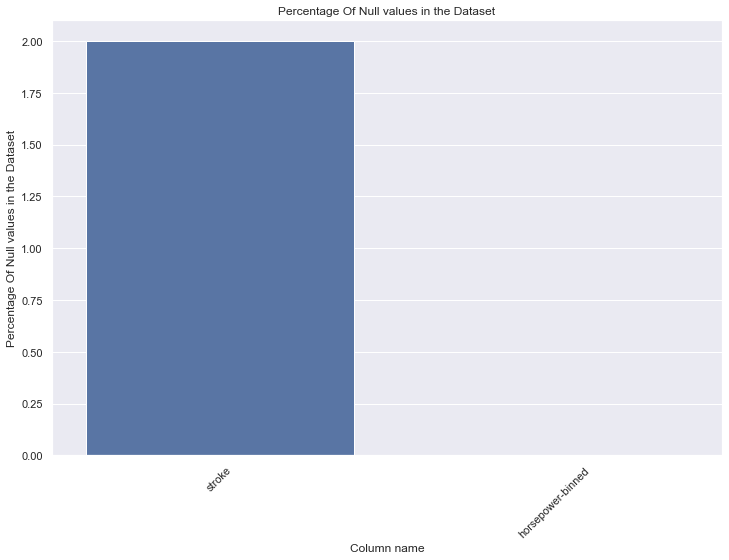

In [16]:
# function: check percentage of missing values
def null_check(dataset):
    
    # Calculating the percentage of missing values
    null_per = (dataset.isnull().sum() / len(dataset)) * 100
    try:
        # dropping null_per == 0
        null_per = round(null_per.drop(null_per[null_per == 0].index)).sort_values(ascending = False)
        
        
        # Making the bar plot of the Null values
        plt.figure(figsize = (12,8))
        null_plot = sns.barplot(x = null_per.index , y = null_per)
        plt.title("Percentage Of Null values in the Dataset")
        plt.xticks(rotation = "45")
        plt.ylabel("Percentage Of Null values in the Dataset")
        plt.xlabel('Column name')
        print(null_plot)
        
    except:
        print("There is NO null values in the dataset")
        print("Returning the Dataset...")
        return dataset

null_check(dataset)

<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
            df.dropna(subset=["price"], axis=0, inplace=True)
        </ul>
    </li>
</ul>

In [17]:
dataset.dropna(subset=["price"], axis=0, inplace=True)

In [18]:
dataset[['stroke' , 'horsepower-binned']]

,stroke,horsepower-binned
0,2.68,Medium
1,2.68,Medium
2,3.47,Medium
3,3.40,Medium
4,3.40,Medium
...,...,...
196,3.15,Medium
197,3.15,High
198,2.87,Medium
199,3.40,Medium


In [19]:
#replacing the data with mean
replace_with_mean = ["stroke"]

for i in replace_with_mean:
    print("replacing values for "  + i)
    mean = dataset[i].astype('float').mean(axis = 0)
    dataset[i].replace(np.nan, mean, inplace = True)

replacing values for stroke


In [20]:
#replacing the data with freqency count
replace_with_count = ["horsepower-binned"]

for i in replace_with_count:
    print("replacing values for "  + i)
    count = dataset[i].value_counts().idxmax()
    dataset[i].replace(np.nan , count , inplace = True)

replacing values for horsepower-binned


In [21]:
#confirmation about the replace values 
dataset.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64

## Simple Linear regression

In [22]:
# create a train and test split for data 
train_data,test_data = train_test_split(dataset,train_size = 0.8,random_state=3)

print("number of test samples :", test_data.shape[0])
print("number of training samples:",train_data.shape[0])

number of test samples : 41
number of training samples: 160


In [23]:
#create lr object for Linearregression
lr = linear_model.LinearRegression()

#train the data 
X_train = np.array(train_data["highway-mpg"], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)

#fit the model 
lr.fit(X_train,y_train)

#test the data 
X_test = np.array(test_data['highway-mpg'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

#predict the price for test dataset
pred = lr.predict(X_test)
#root mean squared error 
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
#r squared training 
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
# r squared test 
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
# 5 fold cross validation
cv = float(format(cross_val_score(lr,dataset[['highway-mpg']],dataset['price'],cv=5).mean(),'.3f'))


print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation

Intercept: 35992.14277164265
Coefficient: [-742.97682967]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,6263.937,0.477,-,0.522,-,0.315


I also printed the intercept and coefficient for the simple linear regression. By using these values and the below definition, we can estimate the  prices manually. The equation we use for our estimations is called hypothesis function and defined as

$$h_{\theta}(X)=\theta_{0}+\theta_{1}x$$

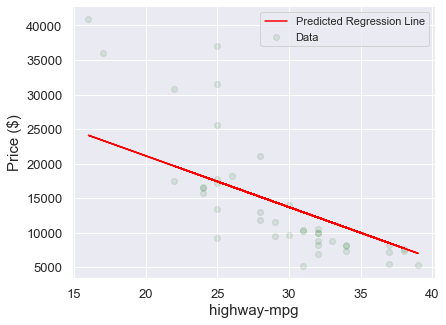

In [24]:
plt.figure(figsize=(6.5,5))
plt.scatter(X_test,y_test,color='darkgreen',label="Data", alpha=.1)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("highway-mpg", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

As we can see this is not a good prediction so we will go for the mutliple linear regression but we need to know what are the featues to include

Number of Correrated features: 11
List of Correrated Features: ['length', 'city-mpg', 'diesel', 'engine-size', 'horsepower', 'width', 'curb-weight', 'gas', 'highway-mpg', 'city-L/100km', 'price']


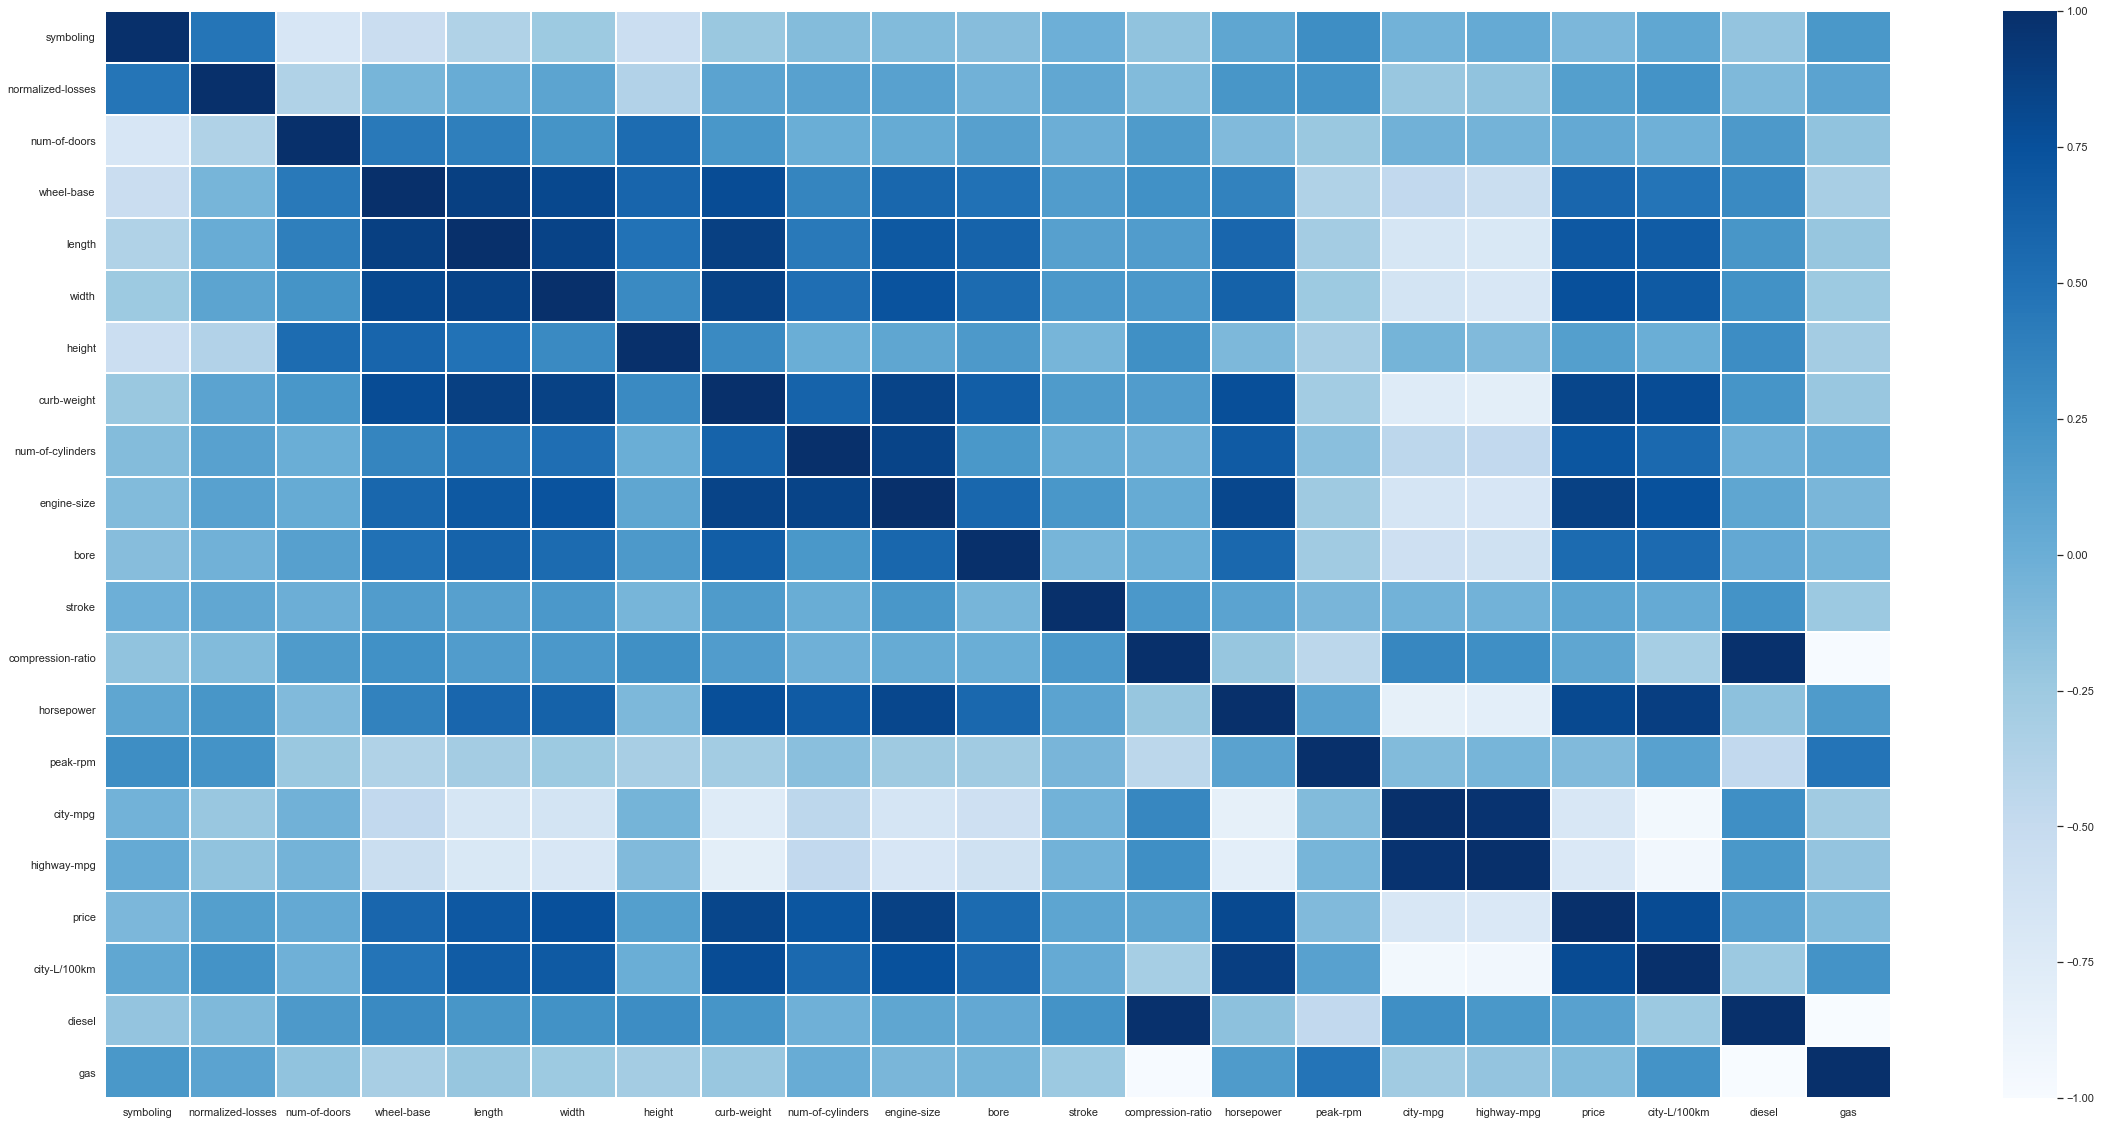

In [25]:
# Understanding the Correration-Coefficient
def correration_coefficient(dataset, figsize, annot):
    corr_matrix = dataset.corr()
    plt.figure(figsize = figsize)
    
    # making the heatmap
    corr_map = sns.heatmap(data = corr_matrix,
                           annot = annot,
                           cmap = "Blues",
                           fmt = "g",
                           linewidths = 1,
                           annot_kws = {"size": 20})
    return corr_map



def select_correration(dataset, threshold):
    # making a set
    corr_set = set()
    
    # making a corr matrix
    corr_matrix = dataset.corr()
    
    # select value under some threshold
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                matrix = corr_matrix.columns[i]
                
                # adding the values in set
                corr_set.add(matrix)
    
    print("Number of Correrated features: {}".format(len(corr_set)))
    print("List of Correrated Features: {}".format(list(corr_set)))


corr_plot = correration_coefficient(dataset, (40,20) ,False)
correrated_features = select_correration(dataset, 0.8)

From above we can see the features that has most Correrated Features: 
['diesel', 'curb-weight', 'gas', 'horsepower', 'engine-size', 'city-mpg', 'length', 'highway-mpg', 'city-L/100km', 'price', 'width']

In [26]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [27]:
train_data_dm,test_data_dm = train_test_split(dataset,train_size = 0.8,random_state=3)

features = ['diesel', 'curb-weight', 'gas', 'horsepower', 'engine-size', 'city-mpg', 'length', 'highway-mpg', 'city-L/100km', 'width']

complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data_dm[features],train_data_dm['price'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data_dm[features],test_data['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,dataset[features],dataset['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -72610.3561512945
Coefficients: [ 1.49159016e+03 -1.22754132e+00 -1.49159016e+03  2.72833862e+01
  9.35173366e+01  4.49901895e+02  4.77434235e+03  4.11833718e+01
  2.15580737e+03  4.09084738e+04]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression-1,selected features,3919.156,0.847,0.838,0.813,0.758,0.603
0,Simple Linear Regression,-,6263.937,0.477,-,0.522,-,0.315


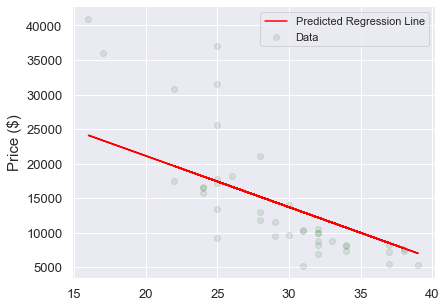

In [28]:
plt.figure(figsize=(6.5,5))
plt.scatter(X_test,y_test,color='darkgreen',label="Data", alpha=.1)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.ylabel("Price ($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

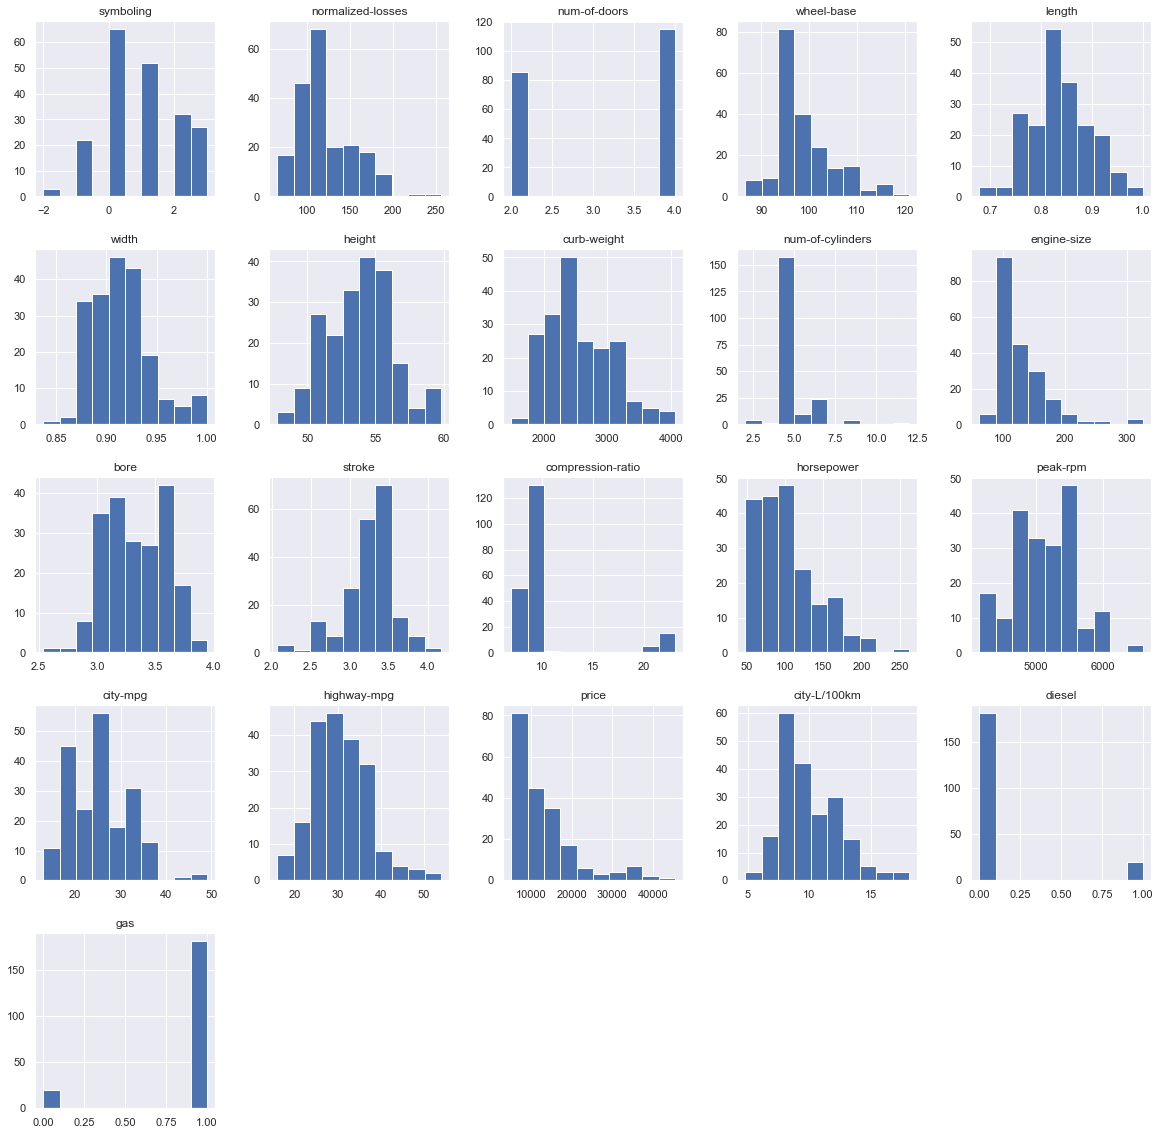

In [29]:
# checking the distribution of features of the dataset
def check_distribution(dataset):
    c_data = dataset.copy()
    c_data.hist(figsize = (20,20))
    plt.show()
    
check_distribution(dataset)

# Regression plot

<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatter plot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>

(0.0, 48176.73425170066)

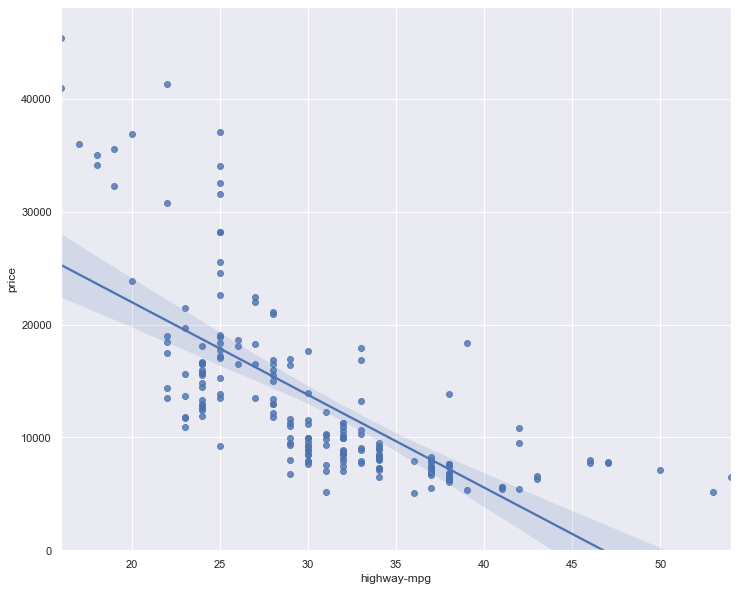

In [31]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=dataset)
plt.ylim(0,)

<p>We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative.
One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data. Let's compare this plot to the regression plot of "peak-rpm".</p>

<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

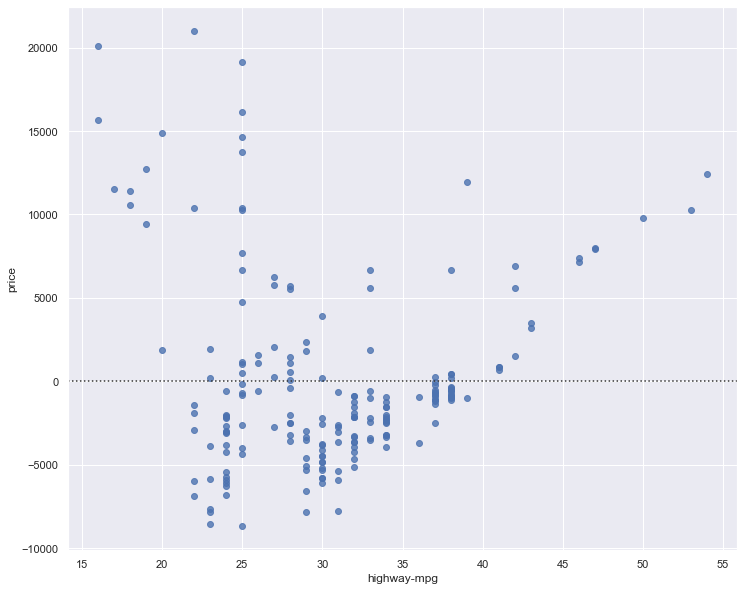

In [33]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(dataset['highway-mpg'], dataset['price'])
plt.show()

<i>What is this plot telling us?</i>

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.</p>

# Multiple Linear Regression

<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>

In [40]:
feature = dataset[['diesel', 'curb-weight', 'gas', 'horsepower', 'engine-size', 'city-mpg', 'length', 'highway-mpg', 'city-L/100km', 'width']
]

lm = linear_model.LinearRegression()
lm.fit(feature, dataset['price'])
Y_hat = lm.predict(feature)

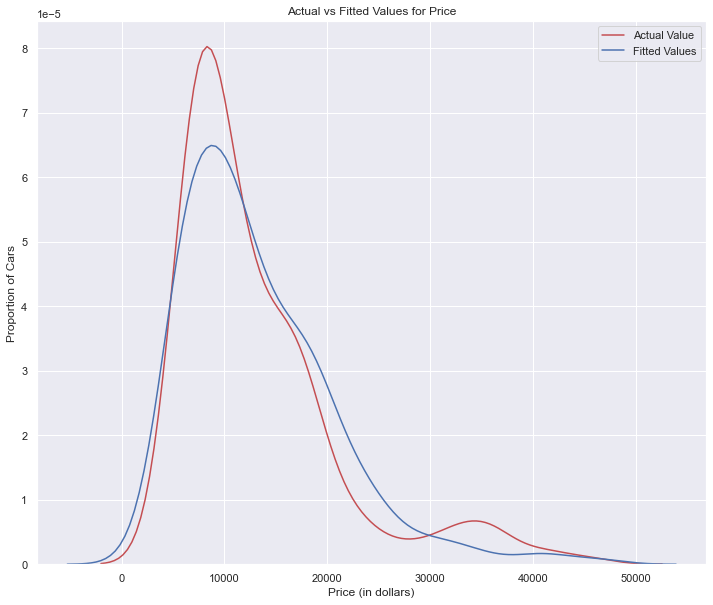

In [42]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(dataset['price'], hist= False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>

In [ ]:
pred = complex_model_1.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data_dm[features],test_data['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

In [44]:
train_data_dm,test_data_dm = train_test_split(dataset,train_size = 0.8,random_state=3)

features = ['diesel', 'curb-weight', 'gas', 'horsepower', 'engine-size', 'city-mpg', 'length', 'highway-mpg', 'city-L/100km', 'width']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data_dm[features],train_data_dm['price'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data_dm[features],test_data['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,dataset[features],dataset['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -72610.3561512945
Coefficients: [ 1.49159016e+03 -1.22754132e+00 -1.49159016e+03  2.72833862e+01
  9.35173366e+01  4.49901895e+02  4.77434235e+03  4.11833718e+01
  2.15580737e+03  4.09084738e+04]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression-1,selected features,3919.156,0.847,0.838,0.813,0.758,0.603
2,Multiple Regression-1,selected features,3919.156,0.847,0.838,0.813,0.758,0.603
0,Simple Linear Regression,-,6263.937,0.477,-,0.522,-,0.315


In [45]:
features = ['diesel', 'curb-weight', 'gas', 'horsepower', 'engine-size', 'city-mpg', 'length', 'highway-mpg', 'city-L/100km', 'width']

complex_model_L = linear_model.Lasso(alpha=1)
complex_model_L.fit(train_data_dm[features],train_data_dm['price'])

pred1 = complex_model_L.predict(test_data_dm[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred1)),'.3f'))
rtrcm1 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(complex_model_L,dataset[features],dataset['price'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=100)
complex_model_L.fit(train_data_dm[features],train_data_dm['price'])

pred2 = complex_model_L.predict(test_data_dm[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred2)),'.3f'))
rtrcm2 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(complex_model_L,dataset[features],dataset['price'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=1000)
complex_model_L.fit(train_data_dm[features],train_data_dm['price'])

pred3 = complex_model_L.predict(test_data_dm[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred3)),'.3f'))
rtrcm3 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm3 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(complex_model_L,dataset[features],dataset['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso Regression','alpha=1, all features',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluation.loc[r+1] = ['Lasso Regression','alpha=100, all features',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluation.loc[r+2] = ['Lasso Regression','alpha=1000, all features',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
3,Lasso Regression,"alpha=1, all features",3897.070,0.847,0.837,0.815,0.761,0.605
1,Multiple Regression-1,selected features,3919.156,0.847,0.838,0.813,0.758,0.603
2,Multiple Regression-1,selected features,3919.156,0.847,0.838,0.813,0.758,0.603
4,Lasso Regression,"alpha=100, all features",3869.038,0.836,0.826,0.818,0.765,0.594
5,Lasso Regression,"alpha=1000, all features",3828.510,0.803,0.791,0.821,0.769,0.551
0,Simple Linear Regression,-,6263.937,0.477,-,0.522,-,0.315


# Polynomial Regression

For the linear models, the main idea is to fit a straight line to our data. However, if the data has a quadratic distribution, this time choosing a quadratic function and applying a polynomial transformation may give us better results. This time the hypothesis function is defined as

$$h_{\theta}(X)=\theta_{0}+\theta_{1}x+\theta_{2}x^{2}+...+\theta_{n}x^{n}$$

Since there are many variations for the polynomial regression, I prefered to show results by a new table and it can be seen from the below table that polynomial transformation improved the model fit a lot. On the other hand, while using polynomial transformation and deciding to degree, we should be very careful because it **migh cause overfitting**. Also, in the below table overfitting exists for some models. The 5-fold cross validation metrics are negative or low for these models although they have very high R-squared values for the training set.

In [46]:
evaluation_poly = pd.DataFrame({'Model': [],
                                'Details':[],
                                'Root Mean Squared Error (RMSE)':[],
                                'R-squared (training)':[],
                                'Adjusted R-squared (training)':[],
                                'R-squared (test)':[],
                                'Adjusted R-squared (test)':[],
                                '5-Fold Cross Validation':[]})

features = ['length', 'city-mpg', 'diesel', 'engine-size', 'horsepower', 'width', 'curb-weight', 'gas', 'highway-mpg', 'city-L/100km']
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(dataset[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred1 = poly.predict(X_testpoly)
rmsepoly1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred1)),'.3f'))
rtrpoly1 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly1 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv1 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,dataset['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=3)
X_allpoly = polyfeat.fit_transform(dataset[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred2 = poly.predict(X_testpoly)
rmsepoly2 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred2)),'.3f'))
rtrpoly2 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly2 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv2 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,dataset['price'],cv=5).mean(),'.3f'))

r = evaluation_poly.shape[0]
evaluation_poly.loc[r] = ['Polynomial Regression','degree=2, selected features, no preprocessing',rmsepoly1,rtrpoly1,'-',rtepoly1,'-',cv1]
evaluation_poly.loc[r+1] = ['Polynomial Regression','degree=3, selected features, no preprocessing',rmsepoly2,rtrpoly2,'-',rtepoly2,'-',cv2]
evaluation_poly_temp = evaluation_poly[['Model','Details','Root Mean Squared Error (RMSE)','R-squared (training)','R-squared (test)','5-Fold Cross Validation']]
evaluation_poly_temp.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
0,Polynomial Regression,"degree=2, selected features, no preprocessing",6567.366,0.952,0.474,-6.158000e+00
1,Polynomial Regression,"degree=3, selected features, no preprocessing",1462295.527,0.998,-26065.594,-2.339563e+07


In [47]:

knnreg = KNeighborsRegressor(n_neighbors=15)
knnreg.fit(train_data_dm[features],train_data_dm['price'])
pred = knnreg.predict(test_data_dm[features])

rmseknn1 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrknn1 = float(format(knnreg.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrknn1 = float(format(adjustedR2(knnreg.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rteknn1 = float(format(knnreg.score(test_data_dm[features],test_data_dm['price']),'.3f'))
arteknn1 = float(format(adjustedR2(knnreg.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(knnreg,dataset[features],dataset['price'],cv=5).mean(),'.3f'))

knnreg = KNeighborsRegressor(n_neighbors=25)
knnreg.fit(train_data_dm[features],train_data_dm['price'])
pred = knnreg.predict(test_data_dm[features])

rmseknn2 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrknn2 = float(format(knnreg.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrknn2 = float(format(adjustedR2(knnreg.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rteknn2 = float(format(knnreg.score(test_data_dm[features],test_data_dm['price']),'.3f'))
arteknn2 = float(format(adjustedR2(knnreg.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(knnreg,dataset[features],dataset['price'],cv=5).mean(),'.3f'))

knnreg = KNeighborsRegressor(n_neighbors=27)
knnreg.fit(train_data_dm[features],train_data_dm['price'])
pred = knnreg.predict(test_data_dm[features])

rmseknn3 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrknn3 = float(format(knnreg.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrknn3 = float(format(adjustedR2(knnreg.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rteknn3 = float(format(knnreg.score(test_data_dm[features],test_data_dm['price']),'.3f'))
arteknn3 = float(format(adjustedR2(knnreg.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(knnreg,dataset[features],dataset['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['KNN Regression','k=15, all features',rmseknn1,rtrknn1,artrknn1,rteknn1,arteknn1,cv1]
evaluation.loc[r+1] = ['KNN Regression','k=25, all features',rmseknn2,rtrknn2,artrknn2,rteknn2,arteknn2,cv2]
evaluation.loc[r+2] = ['KNN Regression','k=27, all features',rmseknn3,rtrknn3,artrknn3,rteknn3,arteknn3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
3,Lasso Regression,"alpha=1, all features",3897.070,0.847,0.837,0.815,0.761,0.605
1,Multiple Regression-1,selected features,3919.156,0.847,0.838,0.813,0.758,0.603
2,Multiple Regression-1,selected features,3919.156,0.847,0.838,0.813,0.758,0.603
4,Lasso Regression,"alpha=100, all features",3869.038,0.836,0.826,0.818,0.765,0.594
5,Lasso Regression,"alpha=1000, all features",3828.510,0.803,0.791,0.821,0.769,0.551
8,KNN Regression,"k=27, all features",5729.409,0.651,0.631,0.600,0.484,0.484
7,KNN Regression,"k=25, all features",5635.255,0.660,0.639,0.613,0.5,0.468
6,KNN Regression,"k=15, all features",4920.701,0.737,0.722,0.705,0.619,0.449
0,Simple Linear Regression,-,6263.937,0.477,-,0.522,-,0.315


In [48]:
evaluation_temp=evaluation.append(evaluation_poly)
evaluation_temp1=evaluation_temp.sort_values(by = '5-Fold Cross Validation', ascending=False)
evaluation_temp2=evaluation_temp1.reset_index()
evaluation_f=evaluation_temp2.iloc[:,1:]
evaluation_f

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Lasso Regression,"alpha=1, all features",3897.070,0.847,0.837,0.815,0.761,6.050000e-01
1,Multiple Regression-1,selected features,3919.156,0.847,0.838,0.813,0.758,6.030000e-01
2,Multiple Regression-1,selected features,3919.156,0.847,0.838,0.813,0.758,6.030000e-01
3,Lasso Regression,"alpha=100, all features",3869.038,0.836,0.826,0.818,0.765,5.940000e-01
4,Lasso Regression,"alpha=1000, all features",3828.510,0.803,0.791,0.821,0.769,5.510000e-01
5,KNN Regression,"k=27, all features",5729.409,0.651,0.631,0.600,0.484,4.840000e-01
6,KNN Regression,"k=25, all features",5635.255,0.660,0.639,0.613,0.5,4.680000e-01
7,KNN Regression,"k=15, all features",4920.701,0.737,0.722,0.705,0.619,4.490000e-01
8,Simple Linear Regression,-,6263.937,0.477,-,0.522,-,3.150000e-01
9,Polynomial Regression,"degree=2, selected features, no preprocessing",6567.366,0.952,-,0.474,-,-6.158000e+00


In [ ]:
c_train = dataset.copy()
train = dataset.copy()

In [ ]:
#Some Statistical Test
class Statistical_tests:
    def __init__(self, train):
        self.train = train
        
    def Anova(self):
        from scipy import stats
        categorical_features = self.train.select_dtypes(exclude = [np.number]).columns
        train[categorical_features] = train[categorical_features].fillna('missing')
        
        #making the ANOVA
        anova = {"features": [], "f":[], "p":[]}
        for cat in c_train[categorical_features]:
            group_prices = []
            
            for group in train[cat].unique():
                group_prices.append(train[train[cat] == group]['price'].values)
            
            f , p = stats.f_oneway(*group_prices)
            anova['features'].append(cat)
            anova['f'].append(f)
            anova['p'].append(p)
            
        anova = pd.DataFrame(anova)
        anova = anova[['features' , 'f', 'p']]
        anova.sort_values('p' , inplace = True)
        
        return anova
    
    
    def mutual_information(self):
        #choosing the numerical features
        numerics = ['int16' , 'int32' , 'int64' , 'float16' , 'float32', 'float64']
        numeric_vars = list(self.train.select_dtypes(include = numerics).columns)
        train = self.train[numeric_vars]
        
        #splitting the dataset into train and test set
        from sklearn.model_selection import train_test_split
        x_train,x_test,y_train,y_test = train_test_split(train.iloc[:,:-1],
                                                        train.iloc[:,-1],
                                                        test_size = 0.3,
                                                        random_state = 0)
        from sklearn.feature_selection import mutual_info_regression
        from sklearn.feature_selection import SelectPercentile
        
        mi = mutual_info_regression(x_train.fillna(0) , y_train)
        mi = pd.Series(mi)
        mi.index = x_train.columns
        mi = mi.sort_values(ascending =False)
        
        #ploting the Bar-plot of dataset
        mi.sort_values(ascending = False).plot.bar(figsize = (20,8))
        
        #selecting the best Numeric-Features 
        
        features = SelectPercentile(mutual_info_regression,
                                   percentile=10).fit(x_train.fillna(0), y_train)
        
        #retunrning the Support of the columns of x_train
        return x_train.columns[features.get_support()]
    
# Accessing the class + methods

sts = Statistical_tests(dataset)
sts.mutual_information()
sts.Anova()
        